In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
%cd '/content/drive/MyDrive/4th year/Parallel Optimization/ParallelOptimizationFinalProject'

/content/drive/MyDrive/4th year/Parallel Optimization/ParallelOptimizationFinalProject


In [39]:
!pip install ply

In [40]:
!ls

helper_file.c	       performance_comparison.csv  pythonToC.py			 side_testing.ipynb
parser.out	       proj_test2.ipynb		   pythonToC_testing.ipynb	 test.c
parsetab.py	       proj_testing.ipynb	   pythonTopython2.py		 test.py
parsing_lex.py	       Py2Py_Test.ipynb		   pythonToPython_testing.ipynb
parsing_testing.ipynb  __pycache__		   README.md
parsing_yacc.py        python_test_again.ipynb	   results.csv


In [41]:
import numpy as np
import pythonToC
import parsing_yacc
from parsing_lex import MyLexer
import pythonTopython2
import time
import pandas as pd
import matplotlib.pyplot as plt

def measure_execution_time(input_code, mode):
    start_time = time.time()
    output = deploy_parser(input_code, mode)
    execution_time = time.time() - start_time
    return output, execution_time

def deploy_parser(input, mode):
    output = ""

    for line in input.split("\n"):
        if line == "":
            continue
        result = parsing_yacc.main(line, mode)
        if isinstance(result, str):
            output += result + "\n"

    print(output)
    return output

def create_input_code(arr_len):
    # Create a list of values with length arr_len
    a_values = np.random.randint(1, 100, arr_len)
    a_values = a_values.tolist()
    b_values = np.random.randint(1, 100, arr_len)
    b_values = b_values.tolist()

    # Create a string with the code to be executed
    # print(str(a_values)[1:-1])
    code = """
a = np.array([%s])
b = np.array([%s])

c = np.add(a, b)
d = np.subtract(a, b)
e = np.sum(a)
f = np.dot(a, b)""" % (str(a_values)[1:-1], str(b_values)[1:-1])

    return code

def run_trials(trials, array_lengths):
    results = []
    for trial in range(trials):
        for array_length in array_lengths:
            input_code = create_input_code(array_length)
            c_output, c_time = measure_execution_time(input_code, "C")
            python_output, python_time = measure_execution_time(input_code, "Python")
            results.append((trial, array_length, c_time, python_time))
    return results

# Create an instance of MyLexer
lexer = MyLexer()

# Build the lexer
lexer.build()

# Test the lexer on the input code
input_code = """
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

c = np.add(a, b)
d = np.subtract(a, b)
e = np.sum(a)
f = np.dot(a, b)
"""
lexer.test(input_code)

trials = 3
array_lengths = [5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000]

results = run_trials(trials, array_lengths)

# print(results)

# # Print the results
# for result in results:
#     print("Trial:", result[0])
#     print("Array Length:", result[1])
#     print("C Code Generation Time:", result[2])
#     print("Python Code Generation Time:", result[3])
#     print()

# Construct a DataFrame from results
results_df = pd.DataFrame(results, columns=["Trial", "Array Length", "C Code Generation Time", "Python Code Generation Time"])

results_df.to_csv('results.csv', index=False)

display(results_df)


LexToken(VARIABLE,'a',1,1)
LexToken(EQUALS,'=',1,3)
LexToken(ARRAY,'np.array',1,5)
LexToken(LPAREN,'(',1,13)
LexToken(LIST,'[1, 2, 3]',1,14)
LexToken(RPAREN,')',1,23)
LexToken(VARIABLE,'b',1,25)
LexToken(EQUALS,'=',1,27)
LexToken(ARRAY,'np.array',1,29)
LexToken(LPAREN,'(',1,37)
LexToken(LIST,'[4, 5, 6]',1,38)
LexToken(RPAREN,')',1,47)
LexToken(VARIABLE,'c',1,50)
LexToken(EQUALS,'=',1,52)
LexToken(NP_ADD,'np.add',1,54)
LexToken(LPAREN,'(',1,60)
LexToken(VARIABLE,'a',1,61)
LexToken(COMMA,',',1,62)
LexToken(VARIABLE,'b',1,64)
LexToken(RPAREN,')',1,65)
LexToken(VARIABLE,'d',1,67)
LexToken(EQUALS,'=',1,69)
LexToken(NP_SUBTRACT,'np.subtract',1,71)
LexToken(LPAREN,'(',1,82)
LexToken(VARIABLE,'a',1,83)
LexToken(COMMA,',',1,84)
LexToken(VARIABLE,'b',1,86)
LexToken(RPAREN,')',1,87)
LexToken(VARIABLE,'e',1,89)
LexToken(EQUALS,'=',1,91)
LexToken(NP_SUM,'np.sum',1,93)
LexToken(LPAREN,'(',1,99)
LexToken(VARIABLE,'a',1,100)
LexToken(RPAREN,')',1,101)
LexToken(VARIABLE,'f',1,103)
LexToken(EQUALS,'=',1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



a = cupy.array([68, 85, 62, 73, 60, 78, 27, 1, 17, 16, 41, 11, 97, 2, 40, 70, 35, 99, 96, 40, 18, 15, 70, 29, 38, 2, 64, 78, 24, 43, 35, 90, 30, 22, 44, 59, 64, 42, 24, 5, 45, 3, 48, 79, 21, 14, 49, 6, 3, 23, 48, 70, 59, 90, 29, 10, 17, 33, 59, 86, 59, 41, 30, 60, 61, 41, 89, 68, 72, 98, 99, 13, 45, 66, 80, 31, 31, 63, 91, 24, 99, 29, 77, 48, 28, 31, 97, 81, 6, 66, 89, 49, 92, 98, 46, 26, 45, 68, 74, 74, 7, 35, 80, 35, 96, 53, 55, 16, 5, 9, 98, 45, 38, 65, 10, 2, 32, 19, 37, 51, 45, 94, 12, 38, 45, 15, 61, 62, 90, 50, 89, 16, 54, 78, 72, 71, 65, 79, 56, 81, 30, 88, 28, 14, 89, 67, 32, 30, 15, 83, 14, 83, 84, 1, 75, 52, 30, 33, 13, 48, 77, 48, 13, 68, 25, 9, 59, 26, 54, 83, 27, 98, 9, 93, 64, 15, 3, 57, 3, 3, 9, 31, 77, 86, 28, 56, 22, 81, 5, 3, 94, 85, 44, 31, 86, 23, 13, 57, 24, 14, 32, 87, 9, 47, 25, 65, 64, 21, 63, 42, 13, 82, 68, 47, 30, 22, 44, 63, 24, 72, 88, 99, 91, 53, 15, 97, 63, 60, 21, 54, 8, 89, 36, 73, 41, 95, 43, 48, 44, 49, 95, 35, 18, 19, 10, 45, 98, 68, 63, 61, 14, 51,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



   float h_a[84, 64, 12, 69, 30, 84, 91, 53, 65, 71, 9, 90, 28, 92, 4, 67, 70, 60, 63, 43, 27, 98, 49, 47, 88, 96, 1, 51, 90, 23, 32, 99, 62, 71, 41, 64, 59, 34, 22, 28, 72, 45, 81, 89, 89, 98, 20, 18, 6, 13] = [84, 64, 12, 69, 30, 84, 91, 53, 65, 71, 9, 90, 28, 92, 4, 67, 70, 60, 63, 43, 27, 98, 49, 47, 88, 96, 1, 51, 90, 23, 32, 99, 62, 71, 41, 64, 59, 34, 22, 28, 72, 45, 81, 89, 89, 98, 20, 18, 6, 13];
    float *d_a;
   cudaMalloc(&d_a,84, 64, 12, 69, 30, 84, 91, 53, 65, 71, 9, 90, 28, 92, 4, 67, 70, 60, 63, 43, 27, 98, 49, 47, 88, 96, 1, 51, 90, 23, 32, 99, 62, 71, 41, 64, 59, 34, 22, 28, 72, 45, 81, 89, 89, 98, 20, 18, 6, 13*sizeof(float);
    cudaMemcpy(d_a, h_a,sizeof(h_a), cudaMemcpyHostToDevice);


   float h_b[75, 31, 3, 61, 1, 68, 78, 24, 17, 41, 15, 13, 34, 34, 80, 78, 36, 92, 48, 20, 81, 32, 20, 33, 59, 20, 5, 22, 99, 64, 27, 30, 4, 14, 95, 71, 81, 51, 91, 21, 69, 39, 85, 27, 11, 82, 4, 52, 70, 64] = [75, 31, 3, 61, 1, 68, 78, 24, 17, 41, 15, 13, 34, 34, 80, 78, 36, 92, 4

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,Trial,Array Length,C Code Generation Time,Python Code Generation Time
0,0,5,0.011456,0.002614
1,0,10,0.013560,0.002696
2,0,50,0.010620,0.002522
3,0,100,0.010047,0.002481
4,0,500,0.009466,0.005961
5,0,1000,0.017082,0.006882
6,0,5000,0.013364,0.007161
7,0,10000,0.011928,0.010790
8,0,50000,0.044827,0.089053
9,0,100000,0.047401,0.297805


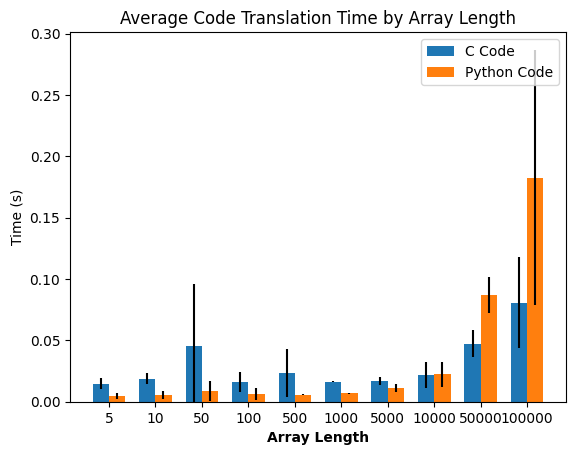

In [42]:
# Make a bar chart

grouped = results_df.groupby('Array Length').agg([np.mean, np.std])
grouped

import matplotlib.pyplot as plt
import numpy as np

# Define bar width
bar_width = 0.35

# Define positions of the left bar boundaries
r1 = np.arange(len(grouped))

fig, ax = plt.subplots()

# Plot 'C Code Generation Time'
rects1 = ax.bar(r1 - bar_width/2, grouped[('C Code Generation Time', 'mean')], bar_width, yerr=grouped[('C Code Generation Time', 'std')], label='C Code')

# Plot 'Python Code Generation Time'
rects2 = ax.bar(r1 + bar_width/2, grouped[('Python Code Generation Time', 'mean')], bar_width, yerr=grouped[('Python Code Generation Time', 'std')], label='Python Code')

# Add xticks on the middle of the group bars
plt.xlabel('Array Length', fontweight='bold')
plt.xticks([r for r in range(len(grouped))], grouped.index)

# Label axes
plt.ylabel('Time (s)')
plt.ylim(bottom=0)

# Set a title
plt.title('Average Code Translation Time by Array Length')

# Create legend & Show graphic
plt.legend()
plt.show()
